# **V-plot**

First we load the dataset and we load only columns 3, 4, 9, 10 for computing X, Y. We then compute X, Y for each row:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("mapped.bed", sep='\t', header=None, usecols=[2,3,8,9], names=['C1_start','C1_end','C2_start','C2_end'])

df['C1_center'] = (df['C1_start'] + df['C1_end']) / 2.0
df['C2_center'] = (df['C2_start'] + df['C2_end']) / 2.0
df['X'] = (df['C2_center'] - df['C1_center']).astype(int)
df['Y'] = df['C2_end'] - df['C2_start']

df.head()

,C1_start,C1_end,C2_start,C2_end,C1_center,C2_center,X,Y
0,90919,91937,90838,91006,91428.0,90922.0,-506,168
1,90919,91937,90846,90998,91428.0,90922.0,-506,152
2,90919,91937,90851,91000,91428.0,90925.5,-502,149
3,90919,91937,90850,91014,91428.0,90932.0,-496,164
4,90919,91937,90900,90965,91428.0,90932.5,-495,65


Next we compute Z which is counter of Y at X:

In [2]:
counts = df.groupby(['Y','X']).size().reset_index(name='Z')
counts.head()

,Y,X,Z
0,40,-357,1
1,40,207,1
2,41,-271,1
3,41,-119,1
4,41,215,1


Finally we plot the heatmap:

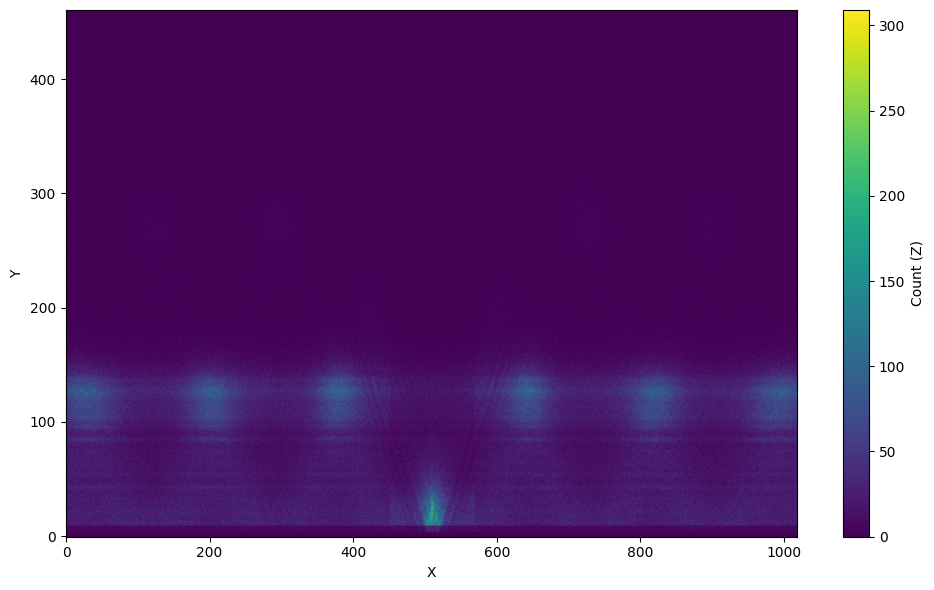

In [3]:
heatmap = counts.pivot(index='Y', columns='X', values='Z').fillna(0)

plt.figure(figsize=(10,6))
plt.imshow(heatmap, aspect='auto', origin='lower')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Count (Z)')
plt.tight_layout()
plt.show()